In [ ]:
import piplite

In [ ]:
await piplite.install("numpy")
await piplite.install("matplotlib")
await piplite.install("scikit-learn")

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

Matplotlib is building the font cache; this may take a moment.


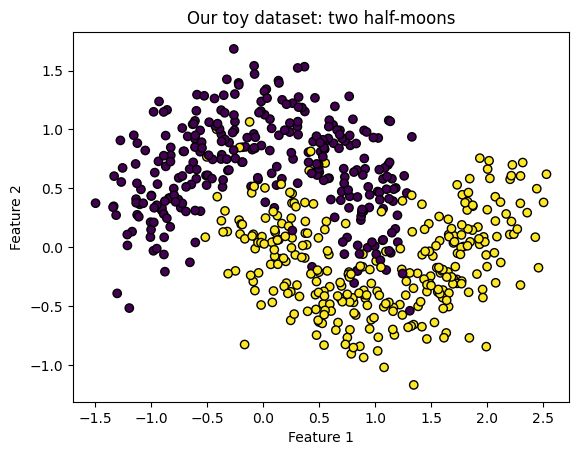

In [2]:
# make_moons makes two interleaving half-circles: simple but not too simple
X, y = make_moons(n_samples=600, noise=0.25, random_state=42)

# Train/test split: model learns from "train", we evaluate on "test"
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Quick look
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y, edgecolor="k")
plt.title("Our toy dataset: two half-moons")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [3]:
model = Pipeline([
    ("scale", StandardScaler()),
    ("nn", MLPClassifier(
        hidden_layer_sizes=(8,),
        activation="relu",
        random_state=42,
        max_iter=500
    ))
])

model.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('nn',
                 MLPClassifier(hidden_layer_sizes=(8,), max_iter=500,
                               random_state=42))])

Accuracy on test set: 0.873


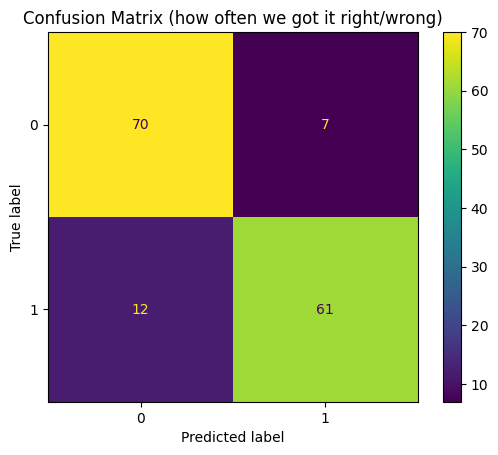

In [4]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy on test set: {acc:.3f}")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix (how often we got it right/wrong)")
plt.show()

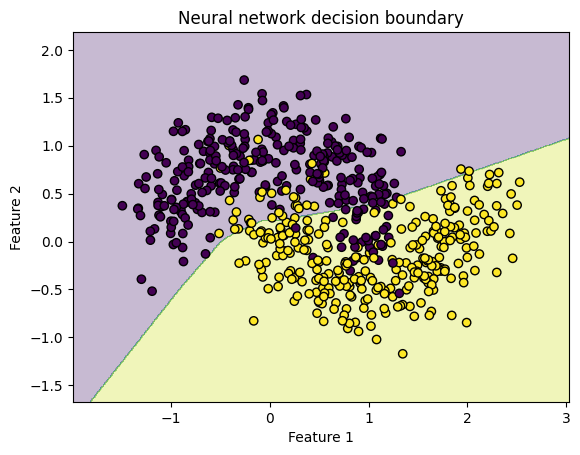

In [5]:
def plot_decision_boundary(clf, X, y, title="Decision boundary"):
    # Create a grid of points that covers the data
    x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 400),
        np.linspace(y_min, y_max, 400)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = clf.predict(grid).reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.3)  # background regions
    plt.scatter(X[:,0], X[:,1], c=y, edgecolor="k")  # actual points
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(model, X, y, title="Neural network decision boundary")

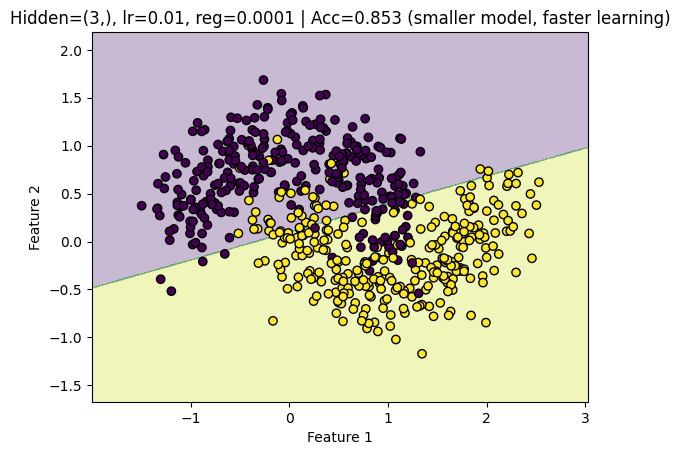

/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


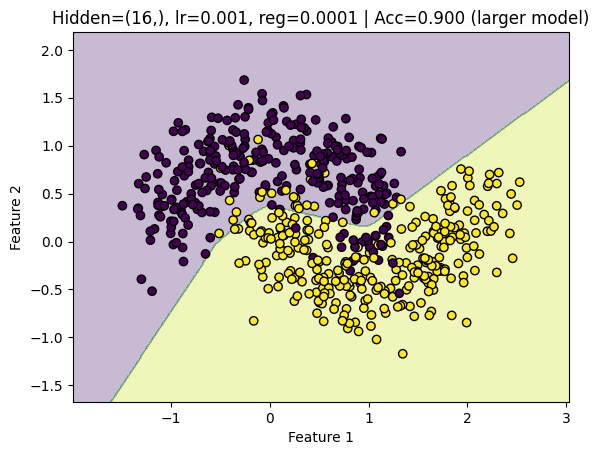

/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


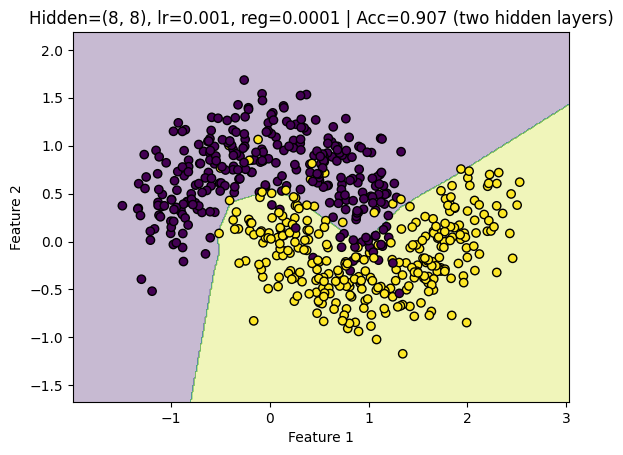

In [6]:
def train_and_plot(hidden=(4,), lr=0.001, reg=0.0001, title_extra=""):
    clf = Pipeline([
        ("scale", StandardScaler()),
        ("nn", MLPClassifier(
            hidden_layer_sizes=hidden,
            activation="relu",
            learning_rate_init=lr,
            alpha=reg,              # L2 regularization (keeps weights small)
            random_state=42,
            max_iter=500
        ))
    ])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    plot_decision_boundary(clf, X, y, title=f"Hidden={hidden}, lr={lr}, reg={reg} | Acc={acc:.3f} {title_extra}")

# Try a few configurations:
train_and_plot(hidden=(3,), lr=0.01, reg=0.0001, title_extra="(smaller model, faster learning)")
train_and_plot(hidden=(16,), lr=0.001, reg=0.0001, title_extra="(larger model)")
train_and_plot(hidden=(8, 8), lr=0.001, reg=0.0001, title_extra="(two hidden layers)")